## STOCK MARKET PREDICTION USING LSTM

Tata Steel Limited is an Indian multinational steel-making company based in Jamshedpur, India. 
It is a subsidiary of the Tata Group.

The given Dataset contains daily Opening price, High price, Low price, Closing price, Number of shares, Number of trades, etc. of TATA STEEL Ltd stock from (03-july-2015 till 02-july-2021)

In [10]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import plotly.graph_objs as go
from plotly.offline import plot
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
print(__version__)
%matplotlib inline

5.9.0


In [11]:
data = pd.read_csv('Tata-steel.csv')

In [12]:
print(data.columns)

Index(['Date', 'Open Price', 'High Price', 'Low Price', 'Close Price', 'WAP',
       'No.of Shares', 'No. of Trades', 'Total Turnover (Rs.)',
       'Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread High-Low',
       'Spread Close-Open'],
      dtype='object')


In [13]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [14]:
import cufflinks as cf

In [15]:
cf.go_offline(connected=True)

In [16]:
data.head(10)

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,03-Jul-15,308.00,308.00,299.75,300.95,302.708180,499554,6430,151219082,118810.0,23.78,8.25,-7.05
1,06-Jul-15,294.90,299.60,292.30,298.75,295.646338,663354,9184,196118181,117663.0,17.74,7.30,3.85
2,07-Jul-15,300.75,303.25,296.00,297.45,299.477691,877207,8581,262703927,211277.0,24.09,7.25,-3.30
3,08-Jul-15,293.80,294.00,282.00,283.40,286.875105,1446189,20272,414875621,563505.0,38.96,12.00,-10.40
4,09-Jul-15,285.20,287.25,279.60,280.55,282.860975,974983,13946,275784642,330248.0,33.87,7.65,-4.65
5,10-Jul-15,282.00,284.60,279.00,280.95,281.406322,702436,9268,197669931,135447.0,19.28,5.60,-1.05
6,13-Jul-15,281.90,285.60,279.15,284.45,282.905447,658957,8413,186422525,136197.0,20.67,6.45,2.55
7,14-Jul-15,285.00,286.90,281.05,281.70,283.275312,561904,7309,159173531,140665.0,25.03,5.85,-3.30
8,15-Jul-15,283.00,284.90,279.40,280.70,281.929804,564323,7346,159099473,139267.0,24.68,5.50,-2.30
9,16-Jul-15,285.00,286.75,280.60,281.50,282.752620,932539,10996,263677846,230537.0,24.72,6.15,-3.50


In [17]:
# To change date in the accepted format
data['Date']=pd.to_datetime(data.Date)
data.head(10)

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,2015-07-03,308.00,308.00,299.75,300.95,302.708180,499554,6430,151219082,118810.0,23.78,8.25,-7.05
1,2015-07-06,294.90,299.60,292.30,298.75,295.646338,663354,9184,196118181,117663.0,17.74,7.30,3.85
2,2015-07-07,300.75,303.25,296.00,297.45,299.477691,877207,8581,262703927,211277.0,24.09,7.25,-3.30
3,2015-07-08,293.80,294.00,282.00,283.40,286.875105,1446189,20272,414875621,563505.0,38.96,12.00,-10.40
4,2015-07-09,285.20,287.25,279.60,280.55,282.860975,974983,13946,275784642,330248.0,33.87,7.65,-4.65
5,2015-07-10,282.00,284.60,279.00,280.95,281.406322,702436,9268,197669931,135447.0,19.28,5.60,-1.05
6,2015-07-13,281.90,285.60,279.15,284.45,282.905447,658957,8413,186422525,136197.0,20.67,6.45,2.55
7,2015-07-14,285.00,286.90,281.05,281.70,283.275312,561904,7309,159173531,140665.0,25.03,5.85,-3.30
8,2015-07-15,283.00,284.90,279.40,280.70,281.929804,564323,7346,159099473,139267.0,24.68,5.50,-2.30
9,2015-07-16,285.00,286.75,280.60,281.50,282.752620,932539,10996,263677846,230537.0,24.72,6.15,-3.50


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       1485 non-null   datetime64[ns]
 1   Open Price                 1485 non-null   float64       
 2   High Price                 1485 non-null   float64       
 3   Low Price                  1485 non-null   float64       
 4   Close Price                1485 non-null   float64       
 5   WAP                        1485 non-null   float64       
 6   No.of Shares               1485 non-null   int64         
 7   No. of Trades              1485 non-null   int64         
 8   Total Turnover (Rs.)       1485 non-null   int64         
 9   Deliverable Quantity       1484 non-null   float64       
 10  % Deli. Qty to Traded Qty  1484 non-null   float64       
 11  Spread High-Low            1485 non-null   float64       
 12  Spread

In [19]:
# To check whether we have any missing Data 
missing_data = data.isnull().sum()
print(missing_data)

Date                         0
Open Price                   0
High Price                   0
Low Price                    0
Close Price                  0
WAP                          0
No.of Shares                 0
No. of Trades                0
Total Turnover (Rs.)         0
Deliverable Quantity         1
% Deli. Qty to Traded Qty    1
Spread High-Low              0
Spread Close-Open            0
dtype: int64


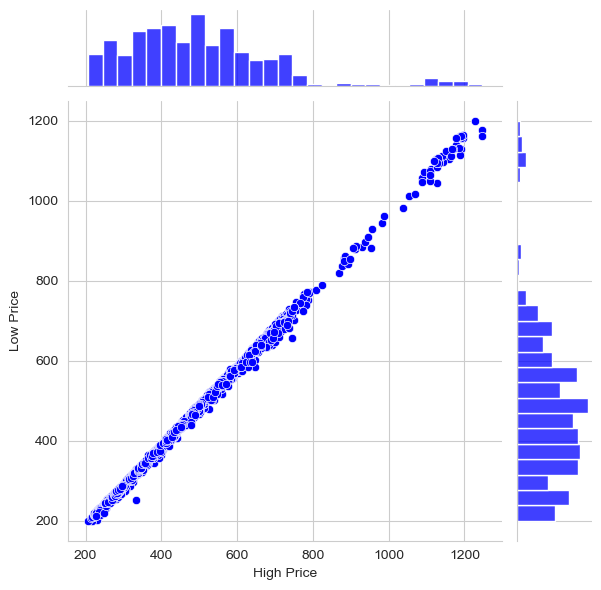

In [20]:
#Exploratory Data Analysis
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
sns.jointplot(x='High Price',y='Low Price',data=data,color='blue')

<AxesSubplot:ylabel='Frequency'>

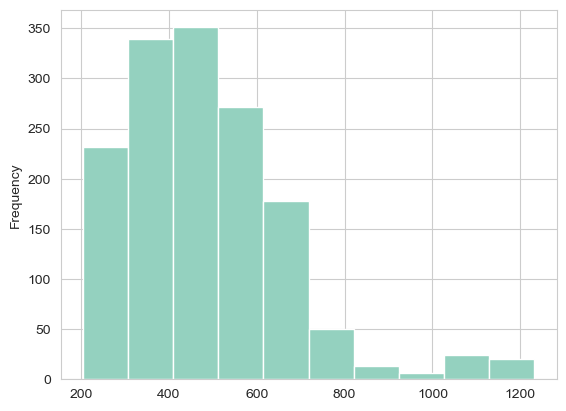

In [21]:
data['Open Price'].plot.hist()

In [22]:
plt.style.use('ggplot')

<AxesSubplot:ylabel='Frequency'>

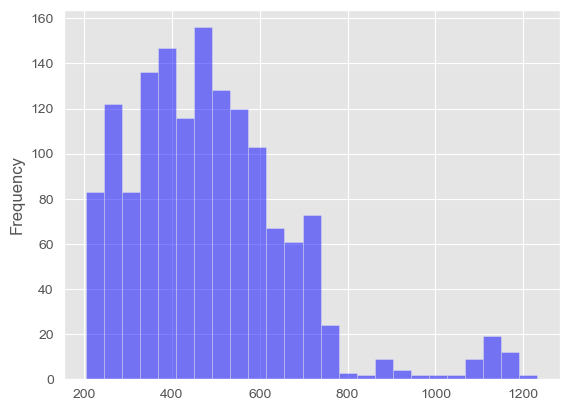

In [23]:
data['Open Price'].plot.hist(alpha=0.5,bins=25,color='blue')

<AxesSubplot:>

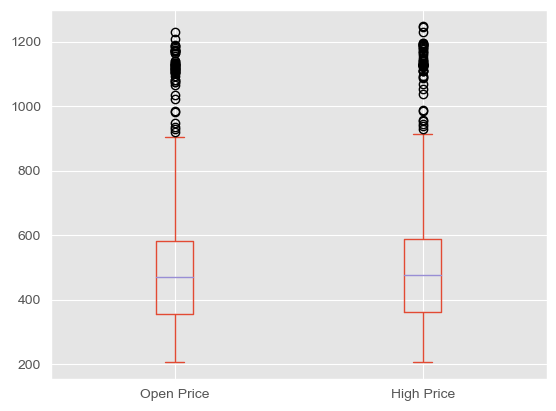

In [24]:
data[['Open Price','Close Price','High Price','Close Price']].plot(kind='box')

In [25]:
#PREDICTION BY A REGRESSION MODEL
#Building the regression MOdel
from sklearn.model_selection import train_test_split

#for preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For Model Evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [26]:
# Split the data into train and test sets
X= np.array(data.index).reshape(-1,1)
Y= data['Close Price']
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.15,random_state=1001)

In [27]:
print(data.keys())

Index(['Date', 'Open Price', 'High Price', 'Low Price', 'Close Price', 'WAP',
       'No.of Shares', 'No. of Trades', 'Total Turnover (Rs.)',
       'Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread High-Low',
       'Spread Close-Open'],
      dtype='object')


In [28]:
print(data.columns)

Index(['Date', 'Open Price', 'High Price', 'Low Price', 'Close Price', 'WAP',
       'No.of Shares', 'No. of Trades', 'Total Turnover (Rs.)',
       'Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread High-Low',
       'Spread Close-Open'],
      dtype='object')


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       1485 non-null   datetime64[ns]
 1   Open Price                 1485 non-null   float64       
 2   High Price                 1485 non-null   float64       
 3   Low Price                  1485 non-null   float64       
 4   Close Price                1485 non-null   float64       
 5   WAP                        1485 non-null   float64       
 6   No.of Shares               1485 non-null   int64         
 7   No. of Trades              1485 non-null   int64         
 8   Total Turnover (Rs.)       1485 non-null   int64         
 9   Deliverable Quantity       1484 non-null   float64       
 10  % Deli. Qty to Traded Qty  1484 non-null   float64       
 11  Spread High-Low            1485 non-null   float64       
 12  Spread

In [30]:
#feature Scaling
scaler= StandardScaler().fit(X_train)
from sklearn.linear_model import LinearRegression

In [31]:
#creating a linear model
lm=LinearRegression()
lm.fit(X_train,Y_train) 

LinearRegression()

In [44]:
import plotly.graph_objs as go
from plotly.offline import iplot

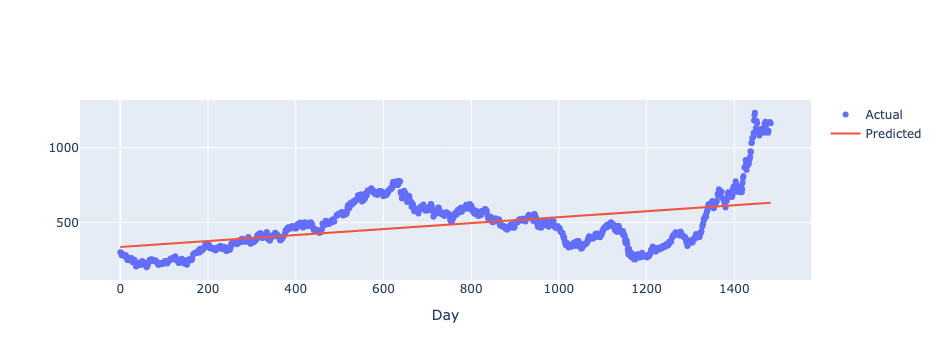

In [46]:
layout = go.Layout(
    xaxis=dict(title=dict(text='Day'))
)
data1 = [trace0, trace1]
plot2 = go.Figure(data=data1, layout=layout)
iplot(plot2)

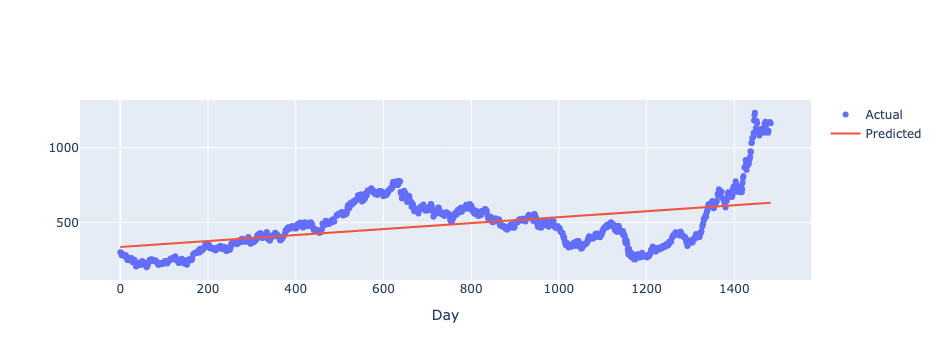

In [47]:
#Plot Actual And predicted values for train dataset
trace0 = go.Scatter(
x = X_train.T[0],
y=Y_train,
mode='markers',
name='Actual'
)
trace1 = go.Scatter(
x = X_train.T[0],
y=lm.predict(X_train).T,
mode='lines',
name='Predicted'
)
data1=[trace0,trace1]
layout.xaxis.title.text='Day'
plot2 = go.Figure(data=data1,layout=layout)
iplot(plot2)

In [48]:
scores =f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train,lm.predict(X_train))}\t{r2_score(Y_test,lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train,lm.predict(X_train))}\t{mse(Y_test,lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.2113637853338285	0.28138911005029477
MSE       26976.312078813757	28115.874513353803



In [49]:
data1=data.reset_index()['Close Price']

In [50]:
#NOW WE WOLL DO PRDCTION USING TENSORFLOW AND PREDICT THE PRICE FOR NEXT 10 DAYS

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data1=scaler.fit_transform(np.array(data1).reshape(-1,1))

In [51]:
print(data1)

[[0.09646022]
 [0.09432957]
 [0.09307055]
 ...
 [0.93506368]
 [0.93167401]
 [0.90513777]]


In [52]:
training_size=int(len(data1)*0.65)
test_size=len(data1)-training_size
train_data,test_data=data1[0:training_size,:],data1[training_size:len(data1),:1]

In [53]:
training_size,test_size

(965, 520)

In [54]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [55]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [56]:
print(X_test.shape), print(ytest.shape)

(419, 100)
(419,)


(None, None)

In [57]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [58]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [59]:
import tensorflow as tf

In [156]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [60]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [159]:
pip install --upgrade numpy

Note: you may need to restart the kernel to use updated packages.


In [160]:
pip list | grep numpy

numpy                             1.26.2
numpydoc                          1.4.0
Note: you may need to restart the kernel to use updated packages.


In [161]:
pip uninstall numpy==<numpy>

zsh:1: parse error near `>'
Note: you may need to restart the kernel to use updated packages.


In [61]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 15s 489ms/step - loss: 0.0248 - val_loss: 0.0323
Epoch 2/100
14/14 [==============================] - 5s 354ms/step - loss: 0.0055 - val_loss: 0.0094
Epoch 3/100
14/14 [==============================] - 5s 351ms/step - loss: 0.0018 - val_loss: 0.0048
Epoch 4/100
14/14 [==============================] - 4s 267ms/step - loss: 9.0222e-04 - val_loss: 0.0035
Epoch 5/100
14/14 [==============================] - 4s 283ms/step - loss: 8.3065e-04 - val_loss: 0.0037
Epoch 6/100
14/14 [==============================] - 4s 280ms/step - loss: 6.9300e-04 - val_loss: 0.0049
Epoch 7/100
14/14 [==============================] - 4s 273ms/step - loss: 6.8819e-04 - val_loss: 0.0048
Epoch 8/100
14/14 [==============================] - 4s 282ms/step - loss: 6.8848e-04 - val_loss: 0.0041
Epoch 9/100
14/14 [==============================] - 4s 273ms/step - loss: 6.4669e-04 - val_loss: 0.0043
Epoch 10/100
14/14 [==============================] - 4s 294ms/ste

In [64]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

14/14 [==============================] - 4s 58ms/step


In [65]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [66]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

508.54428637159975

In [67]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

585.4897452188618

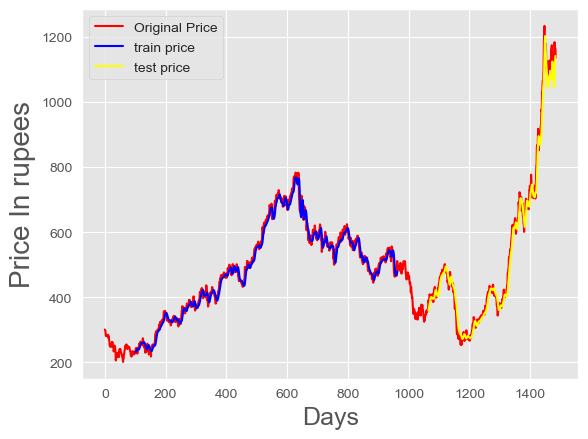

In [69]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(data1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(data1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data1),color='red')
plt.plot(trainPredictPlot,color='blue')
plt.plot(testPredictPlot,color='yellow')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Price In rupees',fontsize=20)
plt.legend(["Original Price","train price","test price"],loc="upper left")

In [70]:
len(test_data)

520

In [71]:
x_input=test_data[420:].reshape(1,-1)
x_input.shape

(1, 100)

In [72]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [73]:
temp_input

[0.46854873855987594,
 0.4857391893855018,
 0.48249479444094706,
 0.473487966684422,
 0.4776039901215437,
 0.4639969008764709,
 0.4556680063919422,
 0.48157474214323753,
 0.4797346375478185,
 0.48084838506609845,
 0.45450583506851955,
 0.4670476006004551,
 0.5115006537213693,
 0.5116459251367971,
 0.5244782334995883,
 0.49726405500944254,
 0.5121785869933659,
 0.5170209675076267,
 0.5572127257759913,
 0.5391990702629412,
 0.5151808629122074,
 0.5191031911287589,
 0.48932255096605487,
 0.5063677303762528,
 0.5021548593288461,
 0.5178441721950509,
 0.5062224589608251,
 0.4871919035397801,
 0.48772456539634884,
 0.5148903200813519,
 0.5250593191612996,
 0.5225897050990267,
 0.48622342743692787,
 0.505108711442545,
 0.5474795409423272,
 0.5795360999467336,
 0.5913515084015302,
 0.6406469420367051,
 0.6450535083046824,
 0.6406469420367051,
 0.6521718076606458,
 0.6937194324730036,
 0.6758510483753812,
 0.6295094668539052,
 0.656239407292625,
 0.6745436056365308,
 0.6665536777880006,
 0.6639

In [74]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.89907104]
101
1 day input [0.48573919 0.48249479 0.47348797 0.47760399 0.4639969  0.45566801
 0.48157474 0.47973464 0.48084839 0.45450584 0.4670476  0.51150065
 0.51164593 0.52447823 0.49726406 0.51217859 0.51702097 0.55721273
 0.53919907 0.51518086 0.51910319 0.48932255 0.50636773 0.50215486
 0.51784417 0.50622246 0.4871919  0.48772457 0.51489032 0.52505932
 0.52258971 0.48622343 0.50510871 0.54747954 0.5795361  0.59135151
 0.64064694 0.64505351 0.64064694 0.65217181 0.69371943 0.67585105
 0.62950947 0.65623941 0.67454361 0.66655368 0.66398722 0.67110552
 0.69715752 0.70103143 0.71575226 0.75134376 0.74543606 0.80407728
 0.8063532  0.83598857 0.83550433 0.84024987 0.87085371 0.95007506
 0.98319694 1.         0.9464917  0.90140913 0.91937436 0.9473149
 0.93259406 0.87501816 0.882427   0.86242797 0.87506658 0.85274321
 0.86702823 0.87395284 0.89516246 0.87061159 0.89312866 0.89133698
 0.88959372 0.89772892 0.88049005 0.87119268 0.88441238 0.92750956
 0.93312673 0.9424241  0.91114232 

In [75]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [76]:
len(data1)

1485

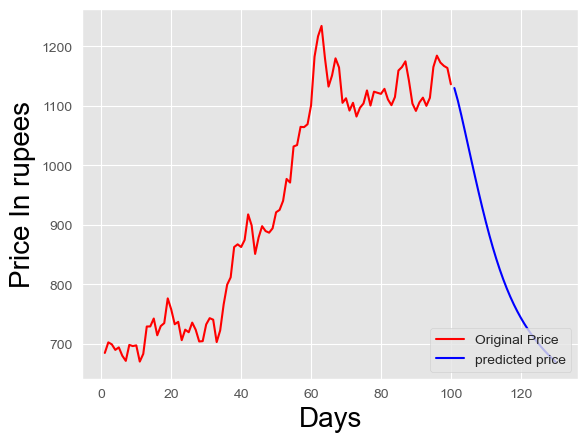

In [78]:
plt.plot(day_new,scaler.inverse_transform(data1[1385:]),color='red')
plt.plot(day_pred,scaler.inverse_transform(lst_output),color='blue')
plt.xlabel('Days',fontsize=20,color='black')
plt.ylabel('Price In rupees',fontsize=20,color='black')

plt.legend(["Original Price","predicted price"],loc="lower right") #predicted price for next 10 days

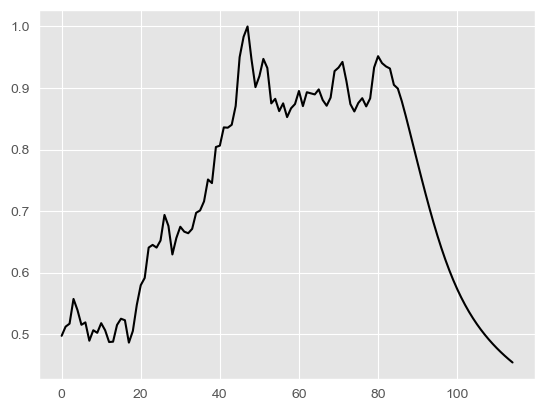

In [79]:
data3=data1.tolist()
data3.extend(lst_output)
plt.plot(data3[1400:],color='black')

In [80]:
data3=scaler.inverse_transform(data3).tolist()

Text(0, 0.5, 'Price In rupees')

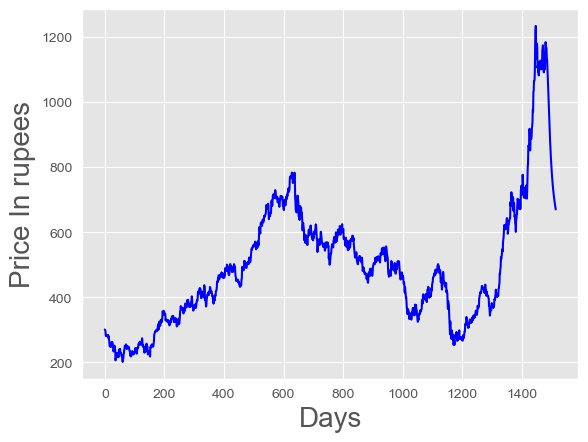

In [81]:
plt.plot(data3,color='blue')
plt.xlabel('Days',fontsize=20)
plt.ylabel('Price In rupees',fontsize=20)